In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
pt_files = []
tst_ls = []
data_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/mTurk_OGdata/emobdr_data/actual_raw/worth/'
pt_files_ls = [f for f in listdir(data_dir)]
for c in pt_files_ls:
    if c[-3:] == 'csv':
        pt_files.append(c)

In [3]:
#1,Spearman rank correlation btwn actual duration of trial and the participants resp
### should be positive-- check!!!


#3 permutation test for each participant: over 10,000 iteration
### each participant's full distribution of resp shuffled, 
### rank correlation btwn time of each trial and shuffled resp computed
### Significance higher than 95% of this null distribution
allz = []
conds_diff = []
c_len = []
b_len = []
a_len = []
t_len = []
pt_c = []
pt_b = []
pt_resp = []
pt_cond = []
sub = []
true_tp = []
pt_throwout = []

tst_ls =[]
one_ls =[]
rho_ls =[]
zscr_ls =[]
cond_ls =[]
tp_ls =[]
resp_ls =[]
resp_diff_ls = []

for one in pt_files:
    pto = pd.read_csv(data_dir+one, header =0)
    pto.columns = pto.columns.str.replace(".", "_")
    sub_num = one.split('_', 1)[0]
    pt1 = pto[24:-1]
    pt = pt1[pt1['slider_response'].notna()]
    tp = pt.dur
    cond = pt.condition
    resp = pt.slider_response
    rho, p = spearmanr(tp, resp)
    zscr = np.arctanh(rho)
    pt["rho"] = rho
    pt["p_value"] = p
    pt["zscr"] = zscr
    allz.append(zscr)
    sub.append(sub_num)
    #for index, row in pt.iterrows():
     #   pt_resp.append(pt.slider_response[index])
      #  pt_cond.append(pt.condition[index])
       # true_tp.append(pt.dur[index])
    
    diff = [a - b for a, b in zip(tp, resp)]
    
    #c_len.append(continious)
    #b_len.append(boundary)
    a_len.append(pt_resp)
    t_len.append(true_tp)
    pt["resp_diff"] = (diff)
    #pt["pt_condition"] = pt_cond
    #pt["true_tp"] = true_tp
    #pt["pt_resp"] = pt_resp
    tst = [one, rho, zscr, cond, tp, resp]#np.mean(diff), continious, boundary] # add pt.slider_response for checking the below comparison with null dist
    tst_ls.append(tst)
    one_ls.append(one)
    rho_ls.append(rho)
    zscr_ls.append(zscr)
    cond_ls.append(cond)
    tp_ls.append(tp)
    resp_ls.append(resp)
    resp_diff_ls.append(diff)
    pt.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_summaries/' + sub_num + '.csv')

<ipython-input-3-78acd8be6801>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt["rho"] = rho
<ipython-input-3-78acd8be6801>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt["p_value"] = p
<ipython-input-3-78acd8be6801>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [4]:
summary_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_summaries/'
summary_files = [f for f in listdir(summary_dir)]
#cnct_summarydf = pd.DataFrame(columns = ['participant', 'dur', 'condition', 'slider_response', 'rho', 'p_value', 'zscr', 'resp_diff'])
pts = []
perceptual = []
both_switches = []
catch = []
percept_mean = []
pval_mean = []
ctch_mean = []
for a in summary_files:
    p_trials = []
    v_trials = []
    ctch_trials = []
    m_percept = []
    m_pval = []
    m_ctch = []
    onept = pd.read_csv(summary_dir + a)
    for index, row in onept.iterrows():
        if onept.switch[index] == "percept":
            p_trials.append(onept.resp_diff[index])
            m_percept.append(onept.slider_response[index])
        if onept.switch[index] == "per_val":
            v_trials.append(onept.resp_diff[index])
            m_pval.append(onept.slider_response[index])
        if onept.switch[index] == "catch":
            ctch_trials.append(onept.resp_diff[index])
            m_ctch.append(onept.slider_response[index])
    p_trials = [p_trials for p_trials in p_trials if str(p_trials) != 'nan']
    v_trials = [v_trials for v_trials in v_trials if str(v_trials) != 'nan']
    ctch_trials = [ctch_trials for ctch_trials in ctch_trials if str(ctch_trials) != 'nan']
    
    m_percept = [m_percept for m_percept in m_percept if str(m_percept) != 'nan']
    m_pval = [m_pval for m_pval in m_pval if str(m_pval) != 'nan']
    m_ctch = [m_ctch for m_ctch in m_ctch if str(m_ctch) != 'nan']
    
    pts.append(a)
    perceptual.append(np.mean(p_trials))
    both_switches.append(np.mean(v_trials))
    catch.append(np.mean(ctch_trials))
    
    percept_mean.append(np.mean(m_percept))
    pval_mean.append(np.mean(m_pval))
    ctch_mean.append(np.mean(m_ctch))
        #onept.participant.astype(str)
        
        #shrt_pt = onept[["participant", 'dur', 'condition', 'slider_response', 'rho', 'p_value', 'zscr', 'resp_diff']]
        

In [5]:
perceptual

[0.5783985209649123,
 1.0970114943103448,
 0.1982786770169492,
 -0.3863579443392857,
 0.7095800721754385,
 -0.48083333331666667,
 1.3550682261228069,
 0.389176206137931,
 0.40131822140677964,
 0.6255116958947369,
 0.47419065236842106,
 0.5457699280175439,
 1.0673706896551725,
 0.44629629631578943,
 0.6590155944561403,
 1.430076628310345,
 0.5185057470689656,
 0.7314967105263158,
 0.9982108908135592,
 1.254555084694915,
 1.0626915708448277,
 0.5771666081,
 0.5421295588999998,
 0.4748538011929824,
 0.6003411306140353,
 -0.06125478927586209,
 1.0348927550701754,
 0.3313056997931034,
 0.7677367260666668,
 0.5102621822033898,
 0.023305084779660996,
 0.26507389163793105,
 0.3517720306724137,
 1.2365496935438598,
 0.35203394396551724,
 0.35470545974137935,
 0.6406923662711863,
 0.36187739463793095,
 0.661530172362069,
 0.6206896551724138,
 0.1137433095423729,
 0.8302356478620689,
 0.8015517241379311,
 1.200616934661017,
 0.6278265108245613,
 0.6345762712033898,
 0.8998634309310345,
 0.3003448

In [6]:
f_df = pd.DataFrame({"participants":pts,
                    "perceptual": perceptual,
                    "both_switches":both_switches,
                    "catch":catch,
                    "percept_mean": percept_mean,
                    "pval_mean": pval_mean,
                    "ctch_mean": ctch_mean})
f_df.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_conddurs_r.csv')

## group check if correlation significant

In [7]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(summary_dir + f) for f in summary_files])
#export to csv
combined_csv.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_combined_csv.csv', index=False, encoding='utf-8-sig')
to_cln = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_combined_csv.csv') #, index=False, encoding='utf-8-sig')
to_cln
clnd_combined = to_cln[to_cln["rho"]>=0.75]
exclude = to_cln[to_cln["rho"]<0.75]
clnd_combined.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_combined_csv.csv', index=False, encoding='utf-8-sig')

In [8]:
print(len(clnd_combined.participant.unique()))
clnd_combined.participant.unique()
print(len(exclude.participant.unique()))
exclude.participant.unique()

39
65


array(['1nan', '2nan', '4nan', '5nan', '6nan', 'A100VV1V2XDQI7',
       'A19CB2C4GY4C60', 'A1A1A9UHNQCI9Y', 'A1C57DJF1HCR3Q',
       'A1DZLZE63NE1ZI', 'A1GKEEI844CEKI', 'A1H5BQHY7VOY3I',
       'A1HWI4N1RJGKYY', 'A1IIUECI2HNG55', 'A1MTRZDRKNB9GV',
       'A1NHTBY5YB9JH7', 'A1PJLZSOUQ4MIL', 'A1SWRO4LMKPCOQ',
       'A1WGSW0SLN4Y91', 'A26L91YL0GDGD8', 'A26ZENZ5G8AEGM',
       'A27PVIL93ZMY46', 'A28Q19NTTP0UIQ', 'A2AVFNOKFHQ2ME',
       'A2B338ZP97RA5W', 'A2F0X4LN9N4O4C', 'A2GM5BW75YCKKW',
       'A2IOT3PCS9G5RK', 'A2OJ5XOEKTKRR9', 'A2U31V169A20GY',
       'A2W547SNOCMC25', 'A2WMSIPUKEIBNS', 'A2YLF04UAKYVF1',
       'A314XJY8V1YL12', 'A36SM7QM8OK3H6', 'A37QFZ8I1TGH2C',
       'A3BVPQFBYGWJWX', 'A3CFNUD7VR2E1E', 'A3DZ46U9XRLVBI',
       'A3EVR7FOPM6EA0', 'A3FOKP72T5I4FR', 'A3GCA0EZKHTJME',
       'A3L60SOWLYEDN2', 'A3MS21UJPMHLK0', 'A3NH3BCC6GHEWR',
       'A3UJO2A7THUZTV', 'A5V3ZMQI0PU3F', 'A6PPB69C6ZJHN',
       'A8FUMDQFBKMXR', 'A8KHWKKGAGOH0', 'ABOEYY9Y0PFRI', 'ACCXC5V05C9R9',
       '

In [9]:
exlst = []
e_lst = exclude.participant.unique()
for a in e_lst:
    csv = a + '.csv'
    exlst.append(csv)
exlst

['1nan.csv',
 '2nan.csv',
 '4nan.csv',
 '5nan.csv',
 '6nan.csv',
 'A100VV1V2XDQI7.csv',
 'A19CB2C4GY4C60.csv',
 'A1A1A9UHNQCI9Y.csv',
 'A1C57DJF1HCR3Q.csv',
 'A1DZLZE63NE1ZI.csv',
 'A1GKEEI844CEKI.csv',
 'A1H5BQHY7VOY3I.csv',
 'A1HWI4N1RJGKYY.csv',
 'A1IIUECI2HNG55.csv',
 'A1MTRZDRKNB9GV.csv',
 'A1NHTBY5YB9JH7.csv',
 'A1PJLZSOUQ4MIL.csv',
 'A1SWRO4LMKPCOQ.csv',
 'A1WGSW0SLN4Y91.csv',
 'A26L91YL0GDGD8.csv',
 'A26ZENZ5G8AEGM.csv',
 'A27PVIL93ZMY46.csv',
 'A28Q19NTTP0UIQ.csv',
 'A2AVFNOKFHQ2ME.csv',
 'A2B338ZP97RA5W.csv',
 'A2F0X4LN9N4O4C.csv',
 'A2GM5BW75YCKKW.csv',
 'A2IOT3PCS9G5RK.csv',
 'A2OJ5XOEKTKRR9.csv',
 'A2U31V169A20GY.csv',
 'A2W547SNOCMC25.csv',
 'A2WMSIPUKEIBNS.csv',
 'A2YLF04UAKYVF1.csv',
 'A314XJY8V1YL12.csv',
 'A36SM7QM8OK3H6.csv',
 'A37QFZ8I1TGH2C.csv',
 'A3BVPQFBYGWJWX.csv',
 'A3CFNUD7VR2E1E.csv',
 'A3DZ46U9XRLVBI.csv',
 'A3EVR7FOPM6EA0.csv',
 'A3FOKP72T5I4FR.csv',
 'A3GCA0EZKHTJME.csv',
 'A3L60SOWLYEDN2.csv',
 'A3MS21UJPMHLK0.csv',
 'A3NH3BCC6GHEWR.csv',
 'A3UJO2A7THUZT

## graph

In [10]:
grph_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_conddurs_r.csv')
grph_csv["abs_perceptual"] = abs(grph_csv.perceptual)
grph_csv["abs_bothswitches"] = abs(grph_csv.both_switches)
grph_csv = grph_csv[~grph_csv['participants'].isin(exlst)]
grph_csv.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_conddurs_r.csv')
grph_csv

,Unnamed: 0,participants,perceptual,both_switches,catch,percept_mean,pval_mean,ctch_mean,abs_perceptual,abs_bothswitches
2,2,3nan.csv,0.198279,0.180455,0.035675,3.564433,3.560924,3.418870,0.198279,0.180455
7,7,A10TYO0H3GLCH6.csv,0.389176,0.319732,0.372338,3.343582,3.447510,3.127662,0.389176,0.319732
8,8,A14PFRHG0A2YY9.csv,0.401318,0.340984,0.465509,3.344444,3.395858,3.117824,0.401318,0.340984
11,11,A1BHINLXH3E2GJ.csv,0.545770,0.530948,0.886940,3.217388,3.223289,2.696394,0.545770,0.530948
13,13,A1C59M3HPCO503.csv,0.446296,0.403202,0.506481,3.360721,3.359510,2.993519,0.446296,0.403202
14,14,A1D4I1QYL9713I.csv,0.659016,0.669209,0.774306,3.086598,3.076554,2.725694,0.659016,0.669209
16,16,A1FGKIKJYSL1MI.csv,0.518506,0.421379,0.976667,3.231494,3.311379,2.648333,0.518506,0.421379
21,21,A1M1TSMJB12177.csv,0.577167,0.519583,0.469167,3.172833,3.257202,3.072500,0.577167,0.519583
24,24,A1NIO3JNX5QTN8.csv,0.600341,0.523164,0.107407,3.154045,3.214124,3.350926,0.600341,0.523164
27,27,A1UKZZL7ANOZRZ.csv,0.331306,0.341474,0.426719,3.401453,3.429712,2.936917,0.331306,0.341474


[]

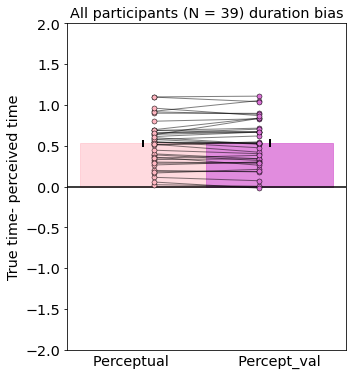

In [11]:
mediumseagreen = '#FFB6C1'
cyan = '#DA70D6'
totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(grph_csv.perceptual), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(grph_csv.perceptual),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(grph_csv.both_switches)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(grph_csv.both_switches),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = grph_csv.perceptual
d = grph_csv.both_switches
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(-2, 2)
plt.xlabel("Perceptual               Percept_val", fontsize = "x-large")
plt.ylabel("True time- perceived time", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) duration bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


AttributeError: 'DataFrame' object has no attribute 'cont_mean'

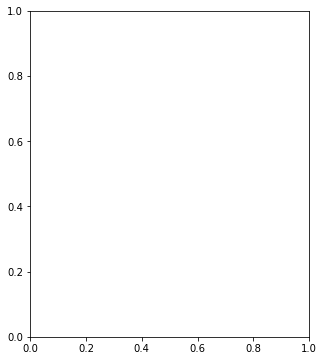

In [12]:
mediumseagreen = '#FFB6C1' #pink
cyan = '#DA70D6' #orchid
totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(grph_csv.cont_mean), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(grph_csv.cont_mean),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(grph_csv.bdry_mean)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(grph_csv.bdry_mean),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = grph_csv.cont_mean
d = grph_csv.bdry_mean
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(0, 5)
plt.xlabel("Continious               Boundary", fontsize = "x-large")
plt.ylabel("Mean duration judgement (s)", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) duration bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

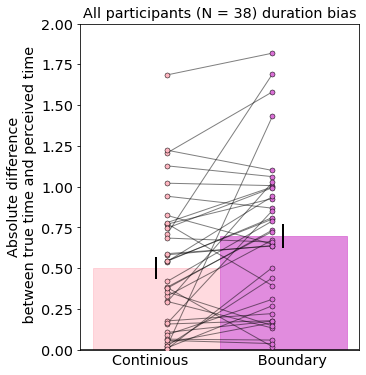

In [12]:
mediumseagreen = '#FFB6C1' #pink
cyan = '#DA70D6' #orchid
totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(grph_csv.abs_cont), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(grph_csv.abs_cont),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(grph_csv.abs_bdr)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(grph_csv.abs_bdr),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = grph_csv.abs_cont
d = grph_csv.abs_bdr
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(0, 2)
plt.xlabel("Continious               Boundary", fontsize = "x-large")
plt.ylabel("Absolute difference\n between true time and perceived time", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) duration bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


### above should work for R

In [7]:
#sub = np.repeat(sub, len(pt.condition))
cb_df= pd.DataFrame({"pt": sub,
            "rho": rho_ls, 
            "zscr":zscr_ls, 
            "condition":cond_ls, 
            "timepoint":tp_ls, 
            "response":resp_ls,
            "resp_diff": resp_diff_ls})
cb_df.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/cb_dfr.csv')

In [34]:
boundary = []
continious = []
catch = []
summary_files

['A1153ZIEQX0ZJ8.csv',
 'A14W0AXTJ3R19V.csv',
 'A183WYXN12P2TJ.csv',
 'A1P6OXEJ86HQRM.csv',
 'A1YC558J4E5KZ.csv',
 'A1YTNGH5SMM2CJ.csv',
 'A1ZD9SJXQ9C6EW.csv',
 'A207IHY6GERCFO.csv',
 'A22KRF782ELLB0.csv',
 'A26UIS59SY4NM6.csv',
 'A27W025UEXS1G0.csv',
 'A2EI075XZT9Y2S.csv',
 'A2HOUSKURBF8UA.csv',
 'A2MCG5W6LHSRG9.csv',
 'A2S7ZT3VZBU2UA.csv',
 'A2VC1UC5Q0E9PO.csv',
 'A2VLTSW6CXIUMR.csv',
 'A30RAYNDOWQ61S.csv',
 'A3DW6KSQPG6GVQ.csv',
 'A3G55RJTW3BSGM.csv',
 'A3GK90X2QOFR53.csv',
 'A3HPLIWSXW3XV8.csv',
 'A3KP8KFGG6734Q.csv',
 'A3O81LHBBI8NPK.csv',
 'A3RLCGRXA34GC0.csv',
 'A3UV55HC87DO9C.csv',
 'A6JKKANO7F4KD.csv',
 'AA9V4NE8SOA4I.csv',
 'AGVUHOBSCP6YC.csv',
 'ANVAFB99K5RKP.csv',
 'AOAZMLP27GD81.csv',
 'AOIR8V07FYMH5.csv',
 'APGX2WZ59OWDN.csv',
 'AR1IWBDA7MC86.csv',
 'AUI3R928P63B0.csv',
 'AUQTHU5AOZVQC.csv',
 'AVPKE76DJLWK6.csv',
 'color.csv',
 'Greg.csv']

In [9]:
grp_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/cb_dfr.csv')
grp_csv_cln = grp_csv[grp_csv.rho>= 0.75]
grp_csv_cln
#cond_ls = grp_csv_cln.condition
#tp_ls = grp_csv_cln.timepoint
#resp_ls = grp_csv_cln.response
#resp_diff_ls = grp_csv_cln.resp_diff

,Unnamed: 0,pt,rho,zscr,condition,timepoint,response,resp_diff
1,1,A14W0AXTJ3R19V,0.849396,1.253980,24 continious\n25 continious\n26 bo...,24 4.5\n25 1.0\n26 4.0\n27 2.0\n28...,24 4.960595\n25 0.683012\n26 3.988616...,"[-0.4605954470000002, 0.31698774099999993, 0.0..."
2,2,A183WYXN12P2TJ,0.933431,1.684409,24 continious\n25 continious\n26 bo...,24 3.0\n25 2.5\n26 3.5\n27 3.0\n28...,24 2.231481\n25 2.351852\n26 2.800926...,"[0.7685185190000001, 0.1481481480000002, 0.699..."
3,3,A1P6OXEJ86HQRM,0.921616,1.599648,24 catch\n25 continious\n26 cont...,24 2.0\n25 0.5\n26 1.0\n27 0.5\n28...,24 1.035587\n25 0.257961\n26 0.433852...,"[0.9644131549999999, 0.242038947, 0.566147569,..."
4,4,A1YC558J4E5KZ,0.846458,1.243526,24 continious\n25 boundary\n26 bo...,24 3.0\n25 4.5\n26 3.0\n27 5.0\n28...,24 2.310185\n25 3.879630\n26 2.629630...,"[0.6898148150000001, 0.6203703699999998, 0.370..."
5,5,A1YTNGH5SMM2CJ,0.971831,2.124249,24 boundary\n25 continious\n26 bo...,24 3.5\n25 3.0\n26 4.5\n27 1.0\n28...,24 4.981482\n25 4.000001\n26 4.972223...,"[-1.4814816969999995, -1.0000005349999999, -0...."
6,6,A1ZD9SJXQ9C6EW,0.881948,1.384470,24 boundary\n25 boundary\n26 bo...,24 4.5\n25 3.5\n26 0.5\n27 3.5\n28...,24 3.982535\n25 2.977726\n26 0.499987...,"[0.5174646380000003, 0.5222736389999998, 1.311..."
7,7,A207IHY6GERCFO,0.890673,1.425171,24 continious\n25 continious\n26 cont...,24 2.5\n25 1.5\n26 2.0\n27 0.5\n28...,24 1.967593\n25 1.000000\n26 1.944444...,"[0.5324074069999998, 0.4999998940000001, 0.055..."
8,8,A22KRF782ELLB0,0.932003,1.673423,24 continious\n25 boundary\n26 cont...,24 0.5\n25 3.0\n26 3.5\n27 4.5\n28...,24 0.800000\n25 3.628571\n26 4.661905...,"[-0.30000000000000004, -0.628571429, -1.161904..."
9,9,A26UIS59SY4NM6,0.916707,1.568002,24 boundary\n25 boundary\n26 cont...,24 5.0\n25 3.0\n26 0.5\n27 2.5\n28...,24 4.462963\n25 1.981481\n26 0.509259...,"[0.5370370370000002, 1.0185185190000001, -0.00..."
10,10,A27W025UEXS1G0,0.941016,1.746853,24 boundary\n25 continious\n26 bo...,24 4.5\n25 4.0\n26 3.0\n27 0.5\n28...,24 4.986111\n25 4.481481\n26 3.990741...,"[-0.4861111110000005, -0.4814814810000003, -0...."


In [135]:
cond_flat = [item for sublist in cond_ls for item in sublist]
time_flat = [item for sublist in t for item in sublist]
resp_flat = [item for sublist in resp_ls for item in sublist]
resp_diff_flat = [item for sublist in resp_diff_ls for item in sublist]

In [136]:
cond_flat

['2',
 '4',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'i',
 'o',
 'u',
 's',
 '\n',
 '2',
 '5',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'i',
 'o',
 'u',
 's',
 '\n',
 '2',
 '6',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'b',
 'o',
 'u',
 'n',
 'd',
 'a',
 'r',
 'y',
 '\n',
 '2',
 '7',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'b',
 'o',
 'u',
 'n',
 'd',
 'a',
 'r',
 'y',
 '\n',
 '2',
 '8',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'i',
 'o',
 'u',
 's',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 '.',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 '8',
 '5',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'i',
 'o',
 'u',
 's',
 '\n',
 '8',
 '6',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'o',
 'n',
 't',
 'i',
 'n',
 'i',
 'o',
 'u',
 's',
 '\n',
 '8',
 '7',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'b',
 'o',
 'u',
 'n',
 'd',
 'a',
 'r',
 'y',
 '\n',
 '8',
 '8',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'b',
 'o',
 'u',
 'n',
 

In [113]:
sub_ls = np.repeat(sub, len(pt))
rhos = np.repeat(rho_ls, len(pt))
zscrs = np.repeat(zscr_ls, len(pt))

In [121]:
len(time_flat)

5292

In [105]:
all_pts = pd.DataFrame({"participant": sub_ls, 
                        "rhos": rhos,
                        "zscrs": zscrs,
                        "condition":cond_flat, 
                        "timepoint":time_flat, 
                        "response":resp_flat,
                        "resp_diff": resp_diff_flat})
all_pts

#all_pts_melt = pd.melt(grp_csv_cln, id_vars=['participant'], value_vars=['conts_resp', 'bdry_resp'], var_name='condition', value_name='resp')
#melted_df

ValueError: arrays must all be same length

In [94]:
len(resp_diff_ls)

36

In [ ]:
all_pts_melt.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/m_allpts.csv')

In [22]:
cond_ls

[24    continious
 25    continious
 26      boundary
 27    continious
 28    continious
          ...    
 85    continious
 86    continious
 87    continious
 88      boundary
 89    continious
 Name: condition, Length: 66, dtype: object,
 24    continious
 25    continious
 26      boundary
 27      boundary
 28    continious
          ...    
 85    continious
 86    continious
 87      boundary
 88      boundary
 89      boundary
 Name: condition, Length: 66, dtype: object,
 24    continious
 25    continious
 26      boundary
 27    continious
 28      boundary
          ...    
 85    continious
 86      boundary
 87      boundary
 88      boundary
 89      boundary
 Name: condition, Length: 66, dtype: object,
 24         catch
 25    continious
 26    continious
 27      boundary
 28      boundary
          ...    
 85    continious
 86      boundary
 87      boundary
 88         catch
 89    continious
 Name: condition, Length: 66, dtype: object,
 24    continious
 25      b

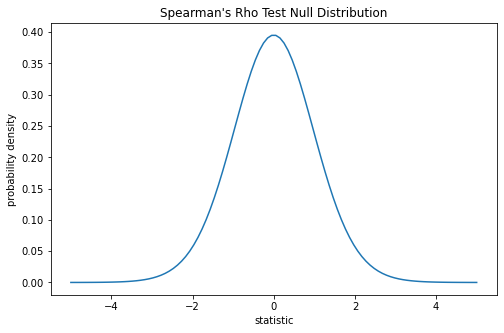

In [8]:
dof = len(tst_ls[1][-1])-2  # len(x) == len(y)
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

1.414890503536984


<ipython-input-9-09b073529ee7>:10: RuntimeWarning: invalid value encountered in sqrt
  transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
C:\Users\ayesh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\Users\ayesh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
<ipython-input-9-09b073529ee7>:15: RuntimeWarning: invalid value encountered in greater_equal
  i = t_vals >= transformed
<ipython-input-9-09b073529ee7>:17: RuntimeWarning: invalid value encountered in less_equal
  i = t_vals <= -transformed


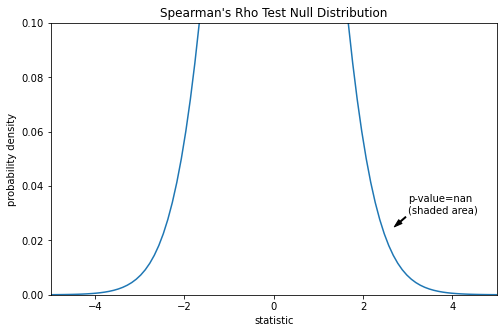

In [9]:
#2 rho values Fisher-transformed; should be significantly above 0 at the group level; i think sooo
##Group level zscore rho
grp_z = np.mean(allz)
print(grp_z)

#for one in pt_files:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
rs = tst_ls[2][2]  # original statistic
transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
pvalue = dist.cdf(-transformed) + dist.sf(transformed)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (2.7, 0.025), (3, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
i = t_vals <= -transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

## checking individual files:

In [6]:
ex = pt_files[-2]

allz = []
conds_diff = []
c_len = []
b_len = []
pt_c = []
pt_b = []
sub = []
pt_throwout = []
pto = pd.read_csv(data_dir+ex, header =0)
pto.columns = pto.columns.str.replace(".", "_")
sub_num = ex.split('_', 1)[0]
pt = pto[24:-1]
df = pt[pt['slider_response'].notna()]
tp = df.dur
cond = df.condition
resp = df.slider_response
rho, p = spearmanr(tp, resp)
zscr = np.arctanh(rho)
pt["rho"] = rho
pt["p_value"] = p
pt["zscr"] = zscr
allz.append(zscr)
boundary = []
continious = []
catch = []
sub.append(sub_num)
for index, row in df.iterrows():
    if pt.condition[index] == 'continious':
        continious.append(df.slider_response[index])
        pt_c.append(df.slider_response[index])
    if pt.condition[index] == 'boundary':
        boundary.append(df.slider_response[index])
        pt_b.append(df.slider_response[index])
    if pt.condition[index] == 'catch':
        catch.append(df.slider_response[index])
        pt_throwout.append(df.slider_response[index])
diff = [a - b for a, b in zip(boundary, continious)]

c_len.append(continious)
b_len.append(boundary)
pt["conds_diff"] = np.mean(diff)
tst = [ex, rho, zscr, np.mean(diff), continious, boundary] # add pt.slider_response for checking the below comparison with null dist
tst_ls.append(tst)

<ipython-input-6-184f774aac22>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt["rho"] = rho
<ipython-input-6-184f774aac22>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt["p_value"] = p
<ipython-input-6-184f774aac22>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [57]:
g = resp[:-1]
tp2 = tp[:-1]
rho, p = spearmanr(tp, resp)
rho2, p2 = spearmanr(tp2, g)

In [7]:
tst

['color_task_2023-11-25_11h05.36.115.csv',
 0.12822295183524413,
 0.1289326761780503,
 -0.07682291656666669,
 [2.962239583,
  3.951822917,
  3.932291667,
  2.493489583,
  3.463541667,
  2.994791667,
  3.802083333,
  1.9921875,
  3.873697917,
  1.5950520830000001,
  1.9856770830000001,
  2.955729167,
  3.489583333,
  1.953125,
  2.864583333,
  3.9453125,
  2.994791667,
  2.102864583,
  2.473958333,
  2.942708333,
  2.5390625,
  3.33984375,
  2.6953125,
  2.688802083,
  3.235677083,
  3.880208333,
  2.513020833,
  3.37890625,
  3.37890625,
  2.044270833],
 [1.97265625,
  2.16796875,
  4.010416667,
  3.430989583,
  2.98828125,
  2.4609375,
  3.014322917,
  1.4453125,
  2.98828125,
  1.4973958330000001,
  1.9986979169999999,
  2.83203125,
  2.838541667,
  2.174479167,
  4.08203125,
  3.834635417,
  3.938802083,
  3.06640625,
  4.0625,
  2.024739583,
  3.463541667,
  2.571614583,
  2.63671875,
  2.467447917,
  3.020833333,
  2.98828125,
  3.977864583,
  2.239583333,
  2.623697917,
  3.33984